<div class="alert alert-info">
    <h2 align="center">سوال پنج قسمت یک </h2>
    <h3 align="center">امیرحسین محمدی</h3>
    <h3 align="center">99101081</h3>
</div>

<h3 align="center">فرخوانی کتابخانه مورد استفاده</h3>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h3 align="center">خواندن داده های آموزش </h3>

In [7]:
Train_Regression = pd.read_csv("train.csv")
print(Train_Regression) 

     age  gender     bmi  children smoker     region      charges
0     19  female  27.900         0    yes  southwest  16884.92400
1     18    male  33.770         1     no  southeast   1725.55230
2     28    male  33.000         3     no  southeast   4449.46200
3     33    male  22.705         0     no  northwest  21984.47061
4     32    male  28.880         0     no  northwest   3866.85520
..   ...     ...     ...       ...    ...        ...          ...
995   39  female  23.275         3     no  northeast   7986.47525
996   39  female  34.100         3     no  southwest   7418.52200
997   63  female  36.850         0     no  southeast  13887.96850
998   33  female  36.290         3     no  northeast   6551.75010
999   36  female  26.885         0     no  northwest   5267.81815

[1000 rows x 7 columns]


<h3 align="center">خواندن داده های تست </h3>

In [8]:
Test_Regression = pd.read_csv("test.csv")
print(Test_Regression) 

     age  gender     bmi  children smoker     region      charges
0     30    male  22.990         2    yes  northwest  17361.76610
1     24    male  32.700         0    yes  southwest  34472.84100
2     24    male  25.800         0     no  southwest   1972.95000
3     48    male  29.600         0     no  southwest  21232.18226
4     47    male  19.190         1     no  northeast   8627.54110
..   ...     ...     ...       ...    ...        ...          ...
145   52    male  32.775         3     no  northwest  11289.10925
146   60    male  32.800         0    yes  southwest  52590.82939
147   20  female  31.920         0     no  northwest   2261.56880
148   55    male  21.500         1     no  southwest  10791.96000
149   42    male  34.100         0     no  southwest   5979.73100

[150 rows x 7 columns]


<h3 align="center">مپ کردن داده های تست و آموزش بر اساس فرضیات مسئله </h3>

In [9]:
def Map_Reform(Data_Frame):
    mapping = {'male': 0, 'female': 1}
    Data_Frame['gender'] = Data_Frame['gender'].map(mapping)
    mapping = {'yes': 1, 'no': 0}
    Data_Frame['smoker'] = Data_Frame['smoker'].map(mapping)
    Data_Frame['age']=Data_Frame['age']**2
    return Data_Frame

In [10]:
Train_Regression = Map_Reform(Train_Regression)
Train_Regression

,age,gender,bmi,children,smoker,region,charges
0,361,1,27.900,0,1,southwest,16884.92400
1,324,0,33.770,1,0,southeast,1725.55230
2,784,0,33.000,3,0,southeast,4449.46200
3,1089,0,22.705,0,0,northwest,21984.47061
4,1024,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
995,1521,1,23.275,3,0,northeast,7986.47525
996,1521,1,34.100,3,0,southwest,7418.52200
997,3969,1,36.850,0,0,southeast,13887.96850
998,1089,1,36.290,3,0,northeast,6551.75010


In [11]:
Test_Regression = Map_Reform(Test_Regression)
Test_Regression

,age,gender,bmi,children,smoker,region,charges
0,900,0,22.990,2,1,northwest,17361.76610
1,576,0,32.700,0,1,southwest,34472.84100
2,576,0,25.800,0,0,southwest,1972.95000
3,2304,0,29.600,0,0,southwest,21232.18226
4,2209,0,19.190,1,0,northeast,8627.54110
...,...,...,...,...,...,...,...
145,2704,0,32.775,3,0,northwest,11289.10925
146,3600,0,32.800,0,1,southwest,52590.82939
147,400,1,31.920,0,0,northwest,2261.56880
148,3025,0,21.500,1,0,southwest,10791.96000


<h3 align="center">وان هات کردن داده های آموزش و تست </h3>

In [12]:
def one_hot(data_frame):
    one_hot_encoding=pd.get_dummies(data_frame['region'])
    data_frame=data_frame.drop('region',axis=1)
    data_frame=data_frame.join(one_hot_encoding)
    return data_frame

In [13]:
Train_Regression=one_hot(Train_Regression)
Train_Regression

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,361,1,27.900,0,1,16884.92400,0,0,0,1
1,324,0,33.770,1,0,1725.55230,0,0,1,0
2,784,0,33.000,3,0,4449.46200,0,0,1,0
3,1089,0,22.705,0,0,21984.47061,0,1,0,0
4,1024,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,1521,1,23.275,3,0,7986.47525,1,0,0,0
996,1521,1,34.100,3,0,7418.52200,0,0,0,1
997,3969,1,36.850,0,0,13887.96850,0,0,1,0
998,1089,1,36.290,3,0,6551.75010,1,0,0,0


In [14]:
Test_Regression=one_hot(Test_Regression)
Test_Regression

,age,gender,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,900,0,22.990,2,1,17361.76610,0,1,0,0
1,576,0,32.700,0,1,34472.84100,0,0,0,1
2,576,0,25.800,0,0,1972.95000,0,0,0,1
3,2304,0,29.600,0,0,21232.18226,0,0,0,1
4,2209,0,19.190,1,0,8627.54110,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
145,2704,0,32.775,3,0,11289.10925,0,1,0,0
146,3600,0,32.800,0,1,52590.82939,0,0,0,1
147,400,1,31.920,0,0,2261.56880,0,1,0,0
148,3025,0,21.500,1,0,10791.96000,0,0,0,1


<h3 align="center">تفکیک ویژگی ها و لیبل ها در داده های آموزش و تست </h3>

In [15]:
def Data_loader(Dframe):
    X,Y = Dframe.drop('charges',axis=1),Dframe['charges']
    return X,Y

In [16]:
X_train,Y_train=Data_loader(Train_Regression)

In [17]:
X_train

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,361,1,27.900,0,1,0,0,0,1
1,324,0,33.770,1,0,0,0,1,0
2,784,0,33.000,3,0,0,0,1,0
3,1089,0,22.705,0,0,0,1,0,0
4,1024,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
995,1521,1,23.275,3,0,1,0,0,0
996,1521,1,34.100,3,0,0,0,0,1
997,3969,1,36.850,0,0,0,0,1,0
998,1089,1,36.290,3,0,1,0,0,0


In [18]:
Y_train

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
995     7986.47525
996     7418.52200
997    13887.96850
998     6551.75010
999     5267.81815
Name: charges, Length: 1000, dtype: float64

In [19]:
X_test,Y_test=Data_loader(Test_Regression)

In [20]:
X_test

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,900,0,22.990,2,1,0,1,0,0
1,576,0,32.700,0,1,0,0,0,1
2,576,0,25.800,0,0,0,0,0,1
3,2304,0,29.600,0,0,0,0,0,1
4,2209,0,19.190,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
145,2704,0,32.775,3,0,0,1,0,0
146,3600,0,32.800,0,1,0,0,0,1
147,400,1,31.920,0,0,0,1,0,0
148,3025,0,21.500,1,0,0,0,0,1


In [21]:
Y_test

0      17361.76610
1      34472.84100
2       1972.95000
3      21232.18226
4       8627.54110
          ...     
145    11289.10925
146    52590.82939
147     2261.56880
148    10791.96000
149     5979.73100
Name: charges, Length: 150, dtype: float64

<h3 align="center">تعریف یک کلاس برای پیاده سازی فرمول بسته ی رگرسیون خطی تعمیم یافته </h3>

In [24]:
class Optimal_Formula_MultipleLinearRegression:
    def Best_Weight(self):
        return self.Best_Weight
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.Best_Weight = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        output = np.zeros(len(X))
        for i in range(X.shape[1]):
            output += X[:, i] * self.Best_Weight[i]
        return output
    
    

<h3 align="center">تعریف تابع هزینه </h3>

In [26]:
def cost_function_SSE(X,Y,B):
    predictions = np.dot(X,B.T)
    cost =np.sum((predictions - Y) ** 2)
    return cost

In [27]:
MLP = Optimal_Formula_MultipleLinearRegression()

<h3 align="center">آموزش بر روی داده های آموزش بر اساس فرمول بسته </h3>

In [33]:
MLP.fit(X_train, Y_train)

<h3 align="center">لیبل های پیش بینی شده </h3>

In [34]:
y_pred = MLP.predict(X_test)
y_pred

array([27435.17187721, 27707.39941277,  1499.5220424 ,  8495.64525538,
        6518.9720481 ,  6303.33101078,  5753.55453641, 34079.6052026 ,
        3786.84642119, 10697.14506115,  6487.01364237, 28768.04161293,
       16917.16265211, 10780.45488059,  5260.29650877, 11814.21976683,
        2043.66032524,  6052.31340672, 15380.29727574,  5583.68773491,
       11972.01668398, 28760.6277469 , 34780.51851838,   362.95074023,
       14295.52353465,  4302.0738227 , 26123.10155161,  -222.87216112,
       11193.91399102,  3937.36909375, 31410.54129981, 36912.16387068,
        4864.37651696, 24413.2046152 , 16962.478943  , 10240.30111677,
       29962.59325171, 33414.85546372,  3525.44092932,  3210.87158357,
       29382.47505013,  1043.13665533, 27738.30825404,  2470.67301615,
       14628.96040872, 31433.52291513,  7042.67568768, 34636.06740657,
        2212.44981213, 33136.97328203, 11415.35592261, 14639.74890848,
       10740.03711598, 33792.86979319,  1650.34177026, 11042.40369446,
      

<h3 align="center">بهترین وزن های بدست آمده بر اساس فرمول بسته </h3>

In [36]:
MLP.Best_Weight

array([ 3.30752409e+00,  2.83185963e+02,  3.37031996e+02,  5.53892111e+02,
        2.38823566e+04, -7.80888479e+03, -8.28010622e+03, -9.12216533e+03,
       -9.10103734e+03])

<h3 align="center">محاسبه ی خطا بین لیبل های واقعی و لیبل های پیش بینی شده بر اساس بهترین وزن بدست آمده بر اساس فرمول بسته برای داده های آموزش و تست </h3>

In [37]:
cost_function_SSE(X_train,Y_train,MLP.Best_Weight)

34673667870.30673

In [38]:
cost_function_SSE(X_test,Y_test,MLP.Best_Weight)

6559655016.021822

<h3 align="center">پیاده سازی گرادیان کاهش تصادفی </h3>

<h3 align="center">مقدار دهی اولیه به وزن ها </h3>

In [39]:
thetas = np.zeros(X_train.shape[1])

In [40]:
new_X_train=(X_train - X_train.min()) / (X_train.max() - X_train.min())
new_X_test=(X_test - X_test.min()) / (X_test.max() - X_test.min())

In [41]:
new_X_train

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,0.009809,1.0,0.346891,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.0,0.517432,0.2,0.0,0.0,0.0,1.0,0.0
2,0.121951,0.0,0.495061,0.6,0.0,0.0,0.0,1.0,0.0
3,0.202810,0.0,0.195962,0.0,0.0,0.0,1.0,0.0,0.0
4,0.185578,0.0,0.375363,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
995,0.317338,1.0,0.212522,0.6,0.0,1.0,0.0,0.0,0.0
996,0.317338,1.0,0.527019,0.6,0.0,0.0,0.0,0.0,1.0
997,0.966331,1.0,0.606915,0.0,0.0,0.0,0.0,1.0,0.0
998,0.202810,1.0,0.590645,0.6,0.0,1.0,0.0,0.0,0.0


In [42]:
Y_train

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
995     7986.47525
996     7418.52200
997    13887.96850
998     6551.75010
999     5267.81815
Name: charges, Length: 1000, dtype: float64

<h3 align="center">پیاده سازی گرادیان کاهشی تصادفی </h3>

In [43]:
def stochastic_gradient_descent(X,y,theta,n_epochs=10):
    c_hist = [0] * n_epochs
    for epoch in range(n_epochs):
        for i in range(len(y)):
            rand_index = np.random.randint(len(y))
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]

            gradients = 2 * ind_x.T.dot(ind_x.dot(theta) - ind_y)
            eta=0.001
            theta = theta - eta * gradients
            c_hist[epoch] = cost_function_SSE(ind_x,ind_y,theta)
    return theta,c_hist

In [52]:
th_n,cost_history = stochastic_gradient_descent(new_X_train,Y_train,thetas)

<h3 align="center">یهترین وزن های بدست آمده بر اساس تابع گرادیان کاهشی تصادفی </h3>

In [53]:
th_n

age          10308.135417
gender        -523.565642
bmi           6752.256953
children      2128.876227
smoker       22043.862850
northeast     2678.787709
northwest     1882.024655
southeast     1631.930143
southwest     1347.585670
dtype: float64

<h3 align="center">محاسبه ی خطا بین لیبل های واقعی و لیبل های پیش بینی شده بر اساس بهترین وزن بدست آمده بر اساس فرمول بسته برای داده های آموزش و تست </h3>

In [54]:
cost_function_SSE(new_X_train,Y_train,th_n)

36605406097.23215

In [55]:
cost_function_SSE(new_X_test,Y_test,th_n)

6815858319.327415

<h3 align="center">پیاده سازی فرمول بسته ی رگرسیون خطی تعمیم یافتع به همراه تنظیم </h3>

In [56]:
class Optimal_Formula_MultipleLinearRegression_wih_Regularization:
    def fit(self, X, y,l):
        X = np.array(X)
        y = np.array(y)
        self.Best_Weight = np.linalg.inv(X.T.dot(X)+l*np.identity(9)).dot(X.T).dot(y)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.Best_Weight[i]
        return result
    
    def Best_Weight(self):
        return self.Best_Weight

<h1>5fold<h1/>

<h3>fold number 1<h3/>

<h3 align="center">تقسیم بندی داده های آموزش به دو بخش آموزشی و اعتبار سنجی و به نسبت 80 20  </h3>

In [58]:
X_train_data_kf1 = X_train[200:]
Y_train_data_kf1=Y_train[200:]
X_val_data_kf1=X_train[:200]
Y_val_data_kf1=Y_train[:200]

<h3 align="center">ریست کردن ایندکس داده های آموزشی </h3>

In [59]:
X_train_data_kf1=X_train_data_kf1.reset_index(drop=True)
Y_train_data_kf1=Y_train_data_kf1.reset_index(drop=True)

In [60]:
X_train_data_kf1

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,361,1,32.110,0,0,0,1,0,0
1,2304,1,32.230,1,0,0,0,1,0
2,3600,1,24.035,0,0,0,1,0,0
3,729,1,36.080,0,1,0,0,1,0
4,2116,0,22.300,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
795,1521,1,23.275,3,0,1,0,0,0
796,1521,1,34.100,3,0,0,0,0,1
797,3969,1,36.850,0,0,0,0,1,0
798,1089,1,36.290,3,0,1,0,0,0


In [61]:
Y_train_data_kf1

0       2130.67590
1       8871.15170
2      13012.20865
3      37133.89820
4       7147.10500
          ...     
795     7986.47525
796     7418.52200
797    13887.96850
798     6551.75010
799     5267.81815
Name: charges, Length: 800, dtype: float64

<h3 align="center">ریست کردن ایندکس داده های اعتبار سنجی </h3>

In [62]:
X_val_data_kf1=X_val_data_kf1.reset_index(drop=True)
Y_val_data_kf1=Y_val_data_kf1.reset_index(drop=True)

In [63]:
X_val_data_kf1

,age,gender,bmi,children,smoker,northeast,northwest,southeast,southwest
0,361,1,27.900,0,1,0,0,0,1
1,324,0,33.770,1,0,0,0,1,0
2,784,0,33.000,3,0,0,0,1,0
3,1089,0,22.705,0,0,0,1,0,0
4,1024,0,28.880,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
195,361,0,30.590,0,0,0,1,0,0
196,1521,1,32.800,0,0,0,0,0,1
197,2025,1,28.600,2,0,0,0,1,0
198,2601,1,18.050,0,0,0,1,0,0


In [64]:
Y_val_data_kf1

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
195     1639.56310
196     5649.71500
197     8516.82900
198     9644.25250
199    14901.51670
Name: charges, Length: 200, dtype: float64

<h3 align="center">انتخاب بهترین ضریب تنظیم </h3>

In [65]:
list_landa=[10,1,0.1,0.01,0.001,0.0001]
list_error_kf1=[]

In [66]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [67]:
for i in range(len(list_landa)):
    MLPR.fit(X_train_data_kf1, Y_train_data_kf1,list_landa[i])
    list_error_kf1.append(cost_function_SSE(X_val_data_kf1,Y_val_data_kf1,MLPR.Best_Weight))

<h3 align="center">لیست  خطا به ازای ضرایب تنظیم مختلف در هر فولد </h3>

In [71]:
list_error_kf1

[6982730166.841026,
 6758757804.405446,
 6758045746.681459,
 6758963077.019268,
 6759067568.867414,
 6759078149.200263]

<h3 align="center">تابعی برای رسم روند تغییرات خطا بر حسب ضریب تنظیم در هر فولد</h3>

In [72]:
def accuracy_diagram(list_landa,list_error):
    
    plt.xlim(0,10) 
    plt.plot(list_landa,list_error)
    plt.show()

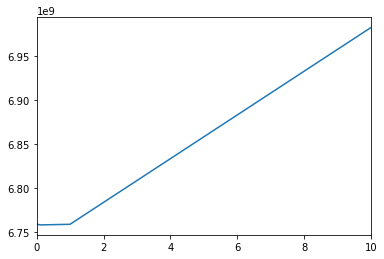

In [73]:
accuracy_diagram(list_landa,list_error_kf1)

<h3>fold number 2<h3/>

In [74]:
X_train_data_kf2 = X_train[:]
Y_train_data_kf2=Y_train[:]
X_val_data_kf2=X_train[200:400]
Y_val_data_kf2=Y_train[200:400]

In [75]:
X_train_data_kf2=X_train_data_kf2.drop(X_val_data_kf2.index)

In [76]:
Y_train_data_kf2=Y_train_data_kf2.drop(Y_val_data_kf2.index)

In [77]:
X_train_data_kf2=X_train_data_kf2.reset_index(drop=True)
Y_train_data_kf2=Y_train_data_kf2.reset_index(drop=True)
X_val_data_kf2=X_val_data_kf2.reset_index(drop=True)
Y_val_data_kf2=Y_val_data_kf2.reset_index(drop=True)

In [78]:
list_error_kf2=[]

In [79]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [80]:
for i in range(len(list_landa)):
    MLPR.fit(X_train_data_kf2, Y_train_data_kf2,list_landa[i])
    list_error_kf2.append(cost_function_SSE(X_val_data_kf2,Y_val_data_kf2,MLPR.Best_Weight))

In [81]:
list_error_kf2

[8138686879.169777,
 7984464940.68418,
 8002102439.933744,
 8005219494.120029,
 8005548376.456602,
 8005581440.945871]

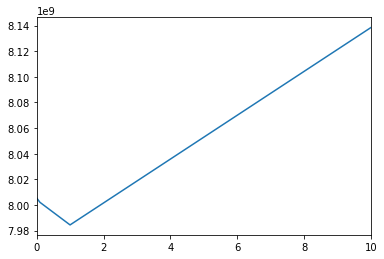

In [82]:
accuracy_diagram(list_landa,list_error_kf2)

<h3>fold number 3<h3/>

In [83]:
X_train_data_kf3 = X_train[:]
Y_train_data_kf3=Y_train[:]
X_val_data_kf3=X_train[400:600]
Y_val_data_kf3=Y_train[400:600]

In [84]:
X_train_data_kf3=X_train_data_kf3.drop(X_val_data_kf3.index)
Y_train_data_kf3=Y_train_data_kf3.drop(Y_val_data_kf3.index)

In [85]:
X_train_data_kf3=X_train_data_kf3.reset_index(drop=True)
Y_train_data_kf3=Y_train_data_kf3.reset_index(drop=True)
X_val_data_kf3=X_val_data_kf3.reset_index(drop=True)
Y_val_data_kf3=Y_val_data_kf3.reset_index(drop=True)

In [86]:
list_error_kf3=[]

In [87]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [88]:
for i in range(len(list_landa)):
    MLPR.fit(X_train_data_kf3, Y_train_data_kf3,list_landa[i])
    list_error_kf3.append(cost_function_SSE(X_val_data_kf3,Y_val_data_kf3,MLPR.Best_Weight))

In [89]:
list_error_kf3

[8941756745.13215,
 8621147029.81699,
 8605399800.28032,
 8604890914.30724,
 8604854256.68135,
 8604850737.706411]

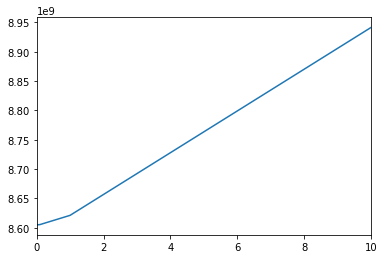

In [90]:
accuracy_diagram(list_landa,list_error_kf3)

<h3>fold number 4<h3/>

In [91]:
X_train_data_kf4 = X_train[:]
Y_train_data_kf4=Y_train[:]
X_val_data_kf4=X_train[600:800]
Y_val_data_kf4=Y_train[600:800]

In [92]:
X_train_data_kf4=X_train_data_kf4.drop(X_val_data_kf4.index)
Y_train_data_kf4=Y_train_data_kf4.drop(Y_val_data_kf4.index)

In [93]:
X_train_data_kf4=X_train_data_kf4.reset_index(drop=True)
Y_train_data_kf4=Y_train_data_kf4.reset_index(drop=True)
X_val_data_kf4=X_val_data_kf4.reset_index(drop=True)
Y_val_data_kf4=Y_val_data_kf4.reset_index(drop=True)

In [94]:
list_error_kf4=[]

In [95]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [96]:
for i in range(len(list_landa)):
    MLPR.fit(X_train_data_kf4, Y_train_data_kf4,list_landa[i])
    list_error_kf4.append(cost_function_SSE(X_val_data_kf4,Y_val_data_kf4,MLPR.Best_Weight))

In [97]:
list_error_kf4

[5717933918.411906,
 5405722121.591957,
 5384742594.161871,
 5383307952.892078,
 5383173359.507265,
 5383159991.67377]

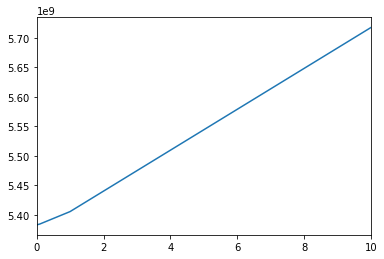

In [98]:
accuracy_diagram(list_landa,list_error_kf4)

<h3>fold number 5<h3/>

In [99]:
X_train_data_kf5 = X_train[:]
Y_train_data_kf5=Y_train[:]
X_val_data_kf5=X_train[800:]
Y_val_data_kf5=Y_train[800:]

In [100]:
X_train_data_kf5=X_train_data_kf5.drop(X_val_data_kf5.index)
Y_train_data_kf5=Y_train_data_kf5.drop(Y_val_data_kf5.index)

In [101]:
X_train_data_kf5=X_train_data_kf5.reset_index(drop=True)
Y_train_data_kf5=Y_train_data_kf5.reset_index(drop=True)
X_val_data_kf5=X_val_data_kf5.reset_index(drop=True)
Y_val_data_kf5=Y_val_data_kf5.reset_index(drop=True)

In [102]:
list_error_kf5=[]

In [103]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [104]:
for i in range(len(list_landa)):
    MLPR.fit(X_train_data_kf5, Y_train_data_kf5,list_landa[i])
    list_error_kf5.append(cost_function_SSE(X_val_data_kf5,Y_val_data_kf5,MLPR.Best_Weight))

In [105]:
list_error_kf5

[6941658546.601015,
 6660968473.886366,
 6646500891.30027,
 6645933618.827795,
 6645888665.156082,
 6645884291.260776]

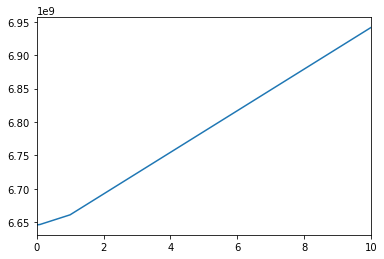

In [106]:
accuracy_diagram(list_landa,list_error_kf5)

<h3 align="center">پیدا کردن بهترین ضریب تنظیم بر اساس 5 فولد و ضرایب تنظیم مفروض در مسئله </h3>

In [107]:
res=[]
for i in range(len(list_error_kf1)):
    res.append(list_error_kf1[i]+list_error_kf2[i]+list_error_kf3[i]+list_error_kf4[i]+list_error_kf5[i])

In [108]:
np.min(res)

35396791472.357666

<h3 align="center">بنابر پارامترهای در نظر گرفته شده در صورت سوال و مقادیر در نظر گرفته شده در تابع، بهترین ضریب تنظیم 0.1 بدست آمد  </h3>

In [111]:
val_error=np.array(res)/6
val_error

array([6.12046104e+09, 5.90517673e+09, 5.89946525e+09, 5.89971918e+09,
       5.89975537e+09, 5.89975910e+09])

<h3 align="center">رسم نمودار روند تغییرات میانگین خطا (در همه ی فولدها) بر اساس ضرایب تنظیم مختلف </h3>

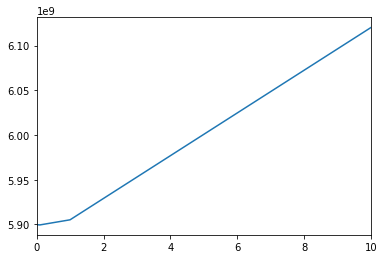

In [112]:
accuracy_diagram(list_landa,val_error)

<h3 align="center">بهترین میزان خطا به ازای ضریب تنظیم 0.1 </h3>

In [113]:
Best_Val_error=np.min(val_Acc)#0.1
Best_Val_error

5899465245.392944

<h3 align="center">پیدا کردن بهترین وزن ها بر اساس ضریب تنظیم 0.1 و پیش بینی بر روی داده های تست </h3>

In [114]:
MLPR = Optimal_Formula_MultipleLinearRegression_wih_Regularization()

In [115]:
MLPR.fit(X_train, Y_train,0.1)

<h3 align="center">محاسبه ی خطا بر روی داده های تست </h3>

In [118]:
cost_function_SSE(X_test,Y_test,MLPR.Best_Weight)

6557799086.168615

<h3 align="center">محاسبه ی خطا بر روی داده های آموزش </h3>

In [120]:
cost_function_SSE(X_train,Y_train,MLPR.Best_Weight)

34674103690.56203

<h3 align="center">بهترین وزن های بدست آمده به ازای ضریب تنظیم 0.1 و با استفاده از فرمول بسته ی رگرسیون </h3>

In [122]:
MLPR.Best_Weight

array([ 3.30500905e+00,  2.74525023e+02,  3.33966177e+02,  5.51660357e+02,
        2.38606968e+04, -7.69939623e+03, -8.17215628e+03, -9.00045597e+03,
       -8.98798270e+03])